In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, log_loss
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.colors as mcolors

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()
print("Total number of samples in train dataset {}".format(train_df.shape[0]))

Total number of samples in train dataset 891


In [4]:
test_df.head()
print("Total number of samples in test dataset {}".format(test_df.shape[0]))

Total number of samples in test dataset 418


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
agePercent = ((train_df['Age'].isnull().sum()/train_df.shape[0]))*100
print("Percent of Missing Age records: {}%".format(agePercent))


Percent of Missing Age records: 19.865319865319865%


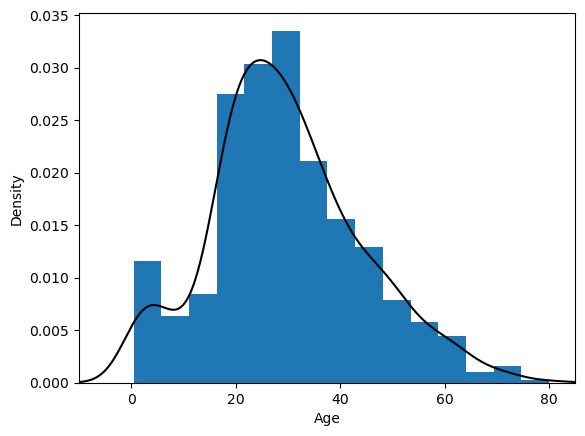

In [8]:
ax = train_df['Age'].hist(bins=15, density=True)
train_df['Age'].plot(kind='density', color='black')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [9]:
print('The median of Age is %.2f' %(train_df["Age"].median()))

The median of Age is 28.00


In [10]:
cabinPercent = ((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100)
print("Percent of Missing Cabin records: {}%".format(cabinPercent))

Percent of Missing Cabin records: 77.10437710437711%


In [11]:
embarkedPercent = (train_df['Embarked'].isnull().sum()/train_df.shape[0])*100
print("Percent of Missing Embarked records: {}%".format(embarkedPercent))

Percent of Missing Embarked records: 0.22446689113355783%


In [12]:
print('Boarded passengers grouped:')
print(train_df['Embarked'].value_counts())

Boarded passengers grouped:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [13]:
print('The median of Fare is %.2f' %(test_df["Fare"].median()))

The median of Fare is 14.45


In [14]:
train_data = train_df.copy()
train_data['Age'].fillna(value=28, inplace=True)
train_data['Embarked'].fillna(value='S', inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [15]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
test_data = test_df.copy()
test_data['Age'].fillna(value=28,inplace=True)
test_data['Fare'].fillna(value=14.45,inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [17]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
train_data['TravelAlone'] = np.where((train_data['SibSp']+train_data['Parch'])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

test_data['TravelAlone'] = np.where((test_data['SibSp']+test_data['Parch'])>0, 0, 1)
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

In [19]:
training=pd.get_dummies(train_data, columns=['Pclass','Embarked','Sex'])
training.drop('Sex_female',axis=1,inplace=True)
training.drop('PassengerId',axis=1,inplace=True)
training.drop('Name',axis=1,inplace=True)
training.drop('Ticket',axis=1,inplace=True)

final_train = training

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing

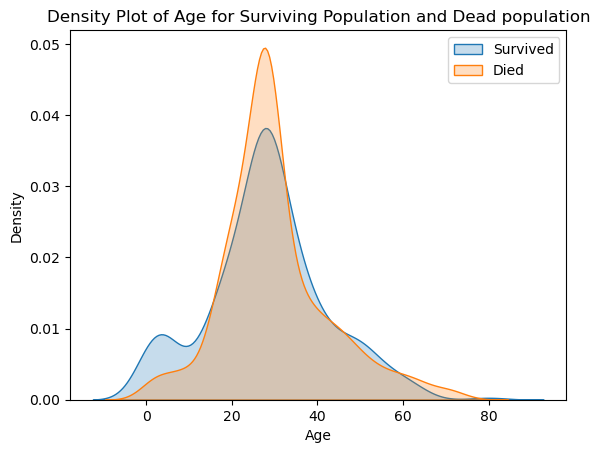

In [20]:
sns.kdeplot(final_train['Age'][final_train.Survived == 1],shade=True)
sns.kdeplot(final_train['Age'][final_train.Survived == 0],shade=True)
plt.legend(['Survived','Died'])
plt.title('Density Plot of Age for Surviving Population and Dead population')
plt.show()

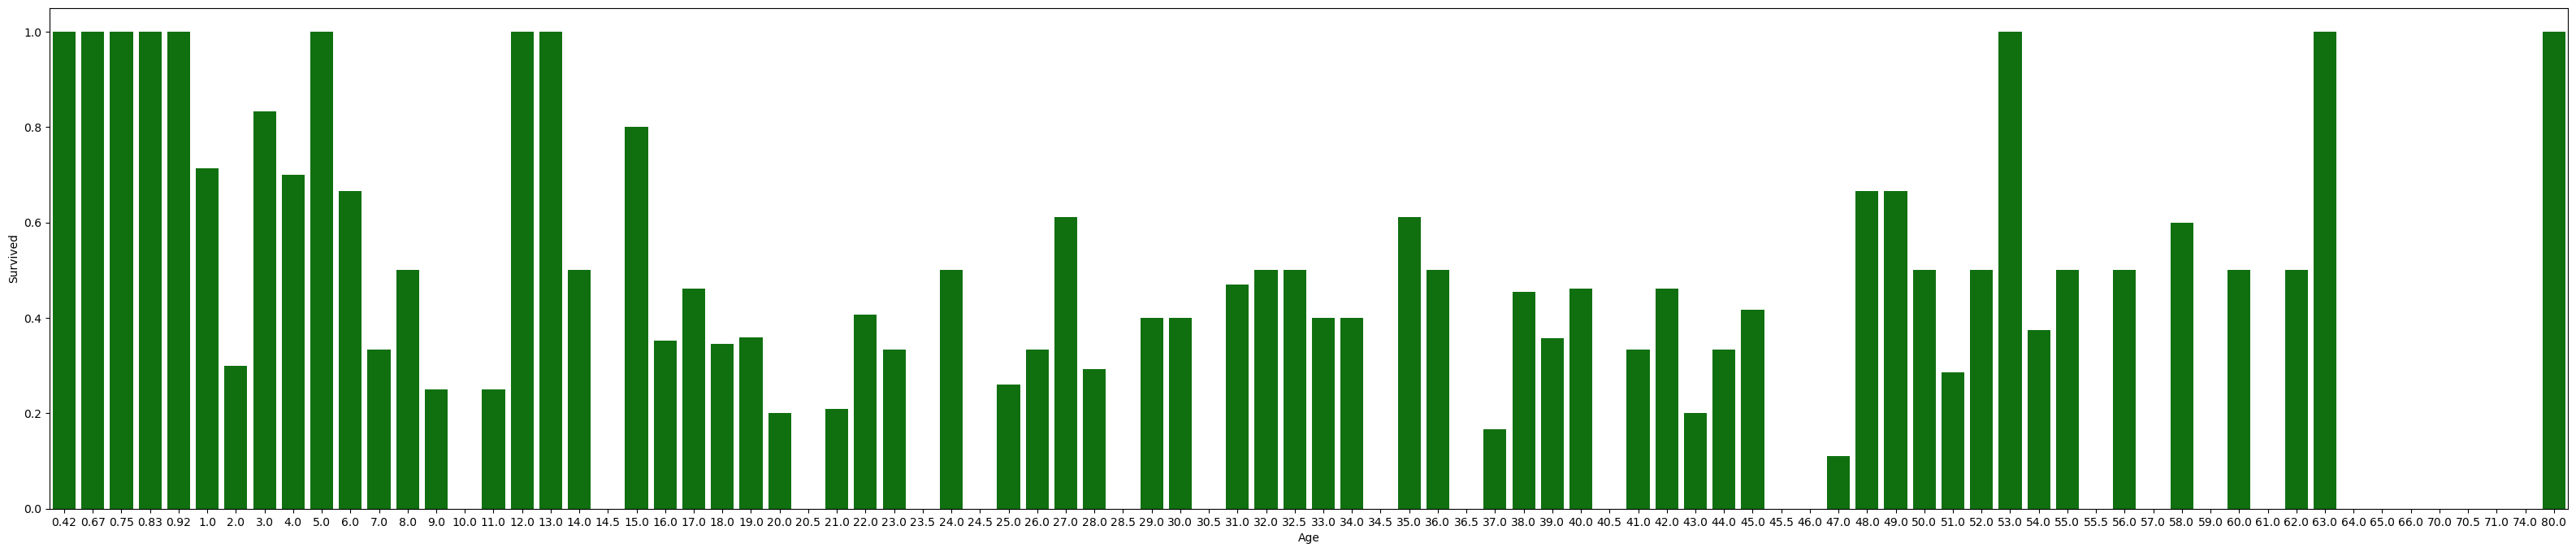

In [21]:
plt.figure(figsize=(40,8))
survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=survival_byage, color = 'green')
plt.show()

In [22]:
final_train['young_aged']=np.where(final_train['Age']<16, 1, 0)
final_train['young_aged']=np.where(final_train['Age']>62,1,0)

final_test['young_aged']=np.where(final_test['Age']<16, 1, 0)
final_test['young_aged']=np.where(final_test['Age']>62,1,0)

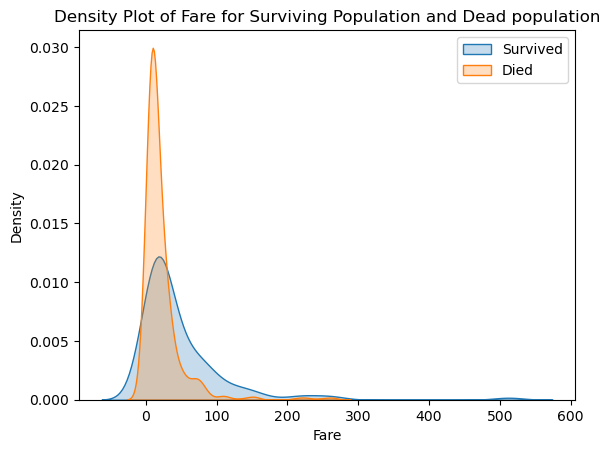

In [23]:
sns.kdeplot(final_train['Fare'][final_train.Survived == 1],shade=True)
sns.kdeplot(final_train['Fare'][final_train.Survived == 0],shade=True)
plt.legend(['Survived','Died'])
plt.title('Density Plot of Fare for Surviving Population and Dead population')
plt.show()

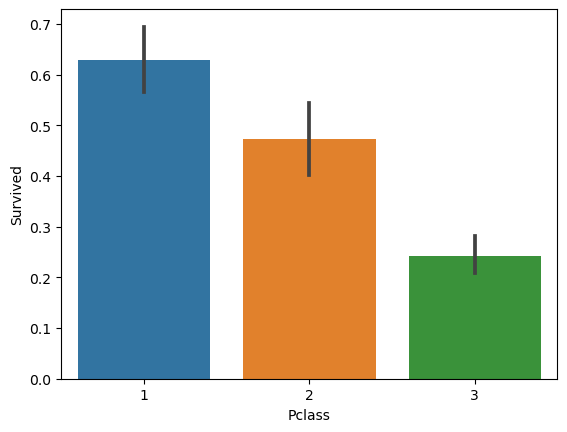

In [24]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.show()

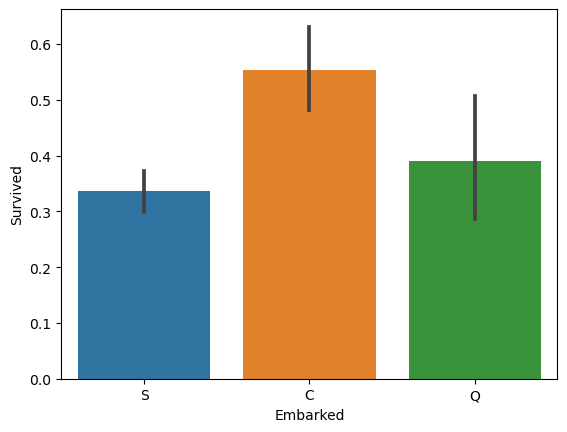

In [25]:

sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.show()

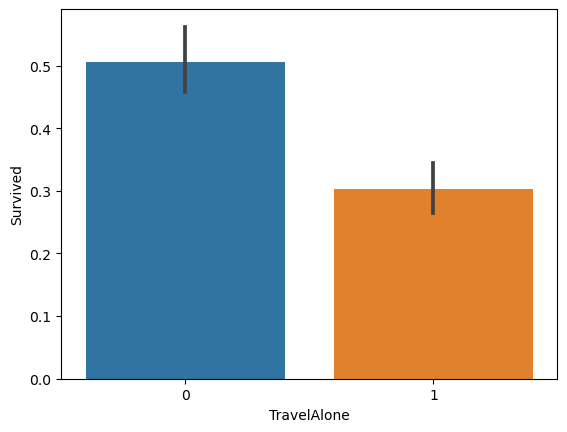

In [26]:
sns.barplot(x='TravelAlone', y='Survived', data=final_train)
plt.show()

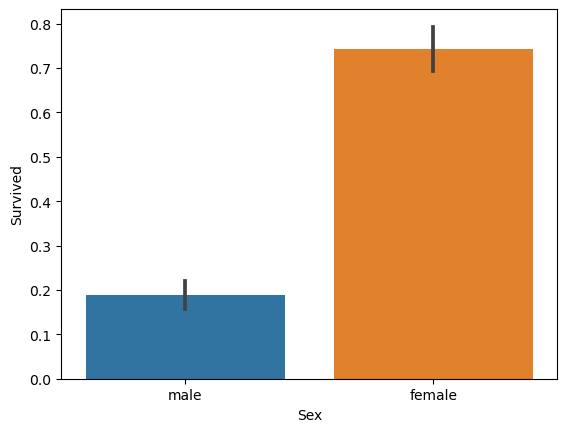

In [27]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.show()

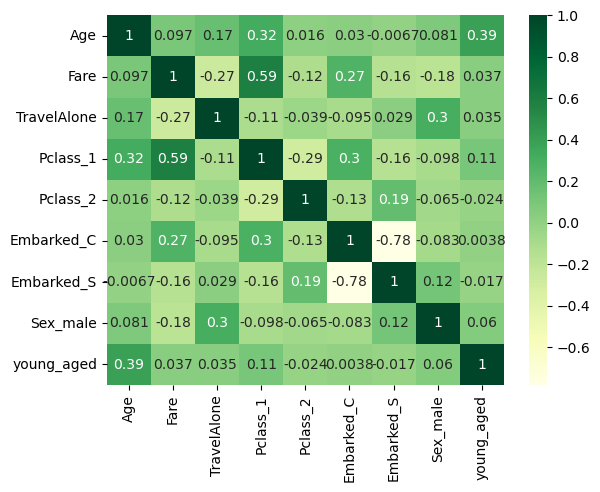

In [36]:
Selected_features = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'young_aged']
X = final_train[Selected_features]

sns.heatmap(X.corr(), cmap="YlGn", annot=True)
plt.show()

In [40]:
Y = final_train['Survived']

#Use train/test split with different random_state values
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

print('Train/Test split results:')
print("Logistic Regression accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print("Logistic Regression log_loss is %2.3f" % log_loss(y_test, y_pred_proba))

Train/Test split results:
Logistic Regression accuracy is 0.782
Logistic Regression log_loss is 0.507


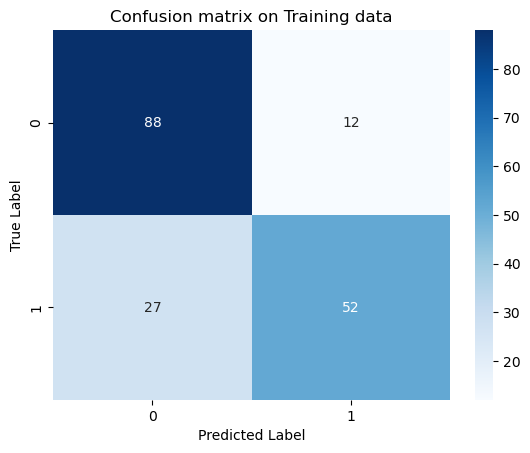

In [42]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Confusion matrix on Training data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [43]:
final_test['Survived'] = logreg.predict(final_test[Selected_features])
final_test['PassengerId'] = test_df['PassengerId']

prediction = final_test[['PassengerId','Survived']]
prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [44]:
prediction['Survived'].value_counts()

0    271
1    147
Name: Survived, dtype: int64

In [45]:
prediction.to_csv("prediction.csv", index = False)